<img src="./images/codecademy_logo.png" style="width: 300px;">

# Machine Learning Capstone Project

## Introduction

For this capstone project, codecademy provided a dataset from **okcupid**, an online dating app that matches users based on a number of multiple choice and short-answer essay questions.

From codecademy:
>*The purpose of this capstone is to practice formulating questions and implementing Machine Learning techniques to answer those questions.*

### Tasks
1. Load in the DataFrame
2. Explore the Data
3. Visualize some of the Data
4. Formulate a Question
5. Augment your Data
6. Normalize your Data
7. Use Classification Techniques
8. Use Regression Techniques
9. Analyze the Accuracy, Precision and Recall
10. Create your Presentation

# 1. Load in the DataFrame

In [1]:
# first, some libraries we'll need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# Load the dataframe
df = pd.read_csv('profiles.csv')

# 2. Explore the data

In [3]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [4]:
df.shape

(59946, 31)

In [5]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [6]:
# Numerical data columns
df.describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [7]:
# not many, and not much to work with
df.corr()

,age,height,income
age,1.000000,-0.022262,-0.001004
height,-0.022262,1.000000,0.065049
income,-0.001004,0.065049,1.000000


### view some categorical data

In [8]:
# pets
df.pets.value_counts()

likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: pets, dtype: int64

In [9]:
# body_type
df.body_type.value_counts()

average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64

In [10]:
# sample some essay responses
df[["essay0", "essay1", "essay2"]].sample(5)

,essay0,essay1,essay2
2530,here it comes:<br />\n- i like writing things ...,-enjoying it.<br />\n-while working hard on we...,"being considerate, my work, balancing my life,..."
53836,"i am a fun, hilarious, witty, sarcastic, easy-...",i just moved to the city with my best friend a...,i'm really good at performing. i sing and danc...
1262,grew up in east texas and speaks southern yall...,i speak to think and generally say what's on m...,"watching tv while i shower, knocking over tabl..."
29120,i hate describing myself. i can never seem to ...,"i graduated cosmetology school in march, and f...","fixing things [problems, freezers, etc.], edit..."
48713,"they say that i should write about myself, so ...","i'm a handsome, intelligent gentleman with a f...",NaN


In [11]:
# sample some more essay responses
df[["essay7", "essay8", "essay9"]].sample(5)

,essay7,essay8,essay9
47006,"out with friends finding new restaurants, atte...",just ask me...,we rank as a high percentile or if you're real...
29591,NaN,NaN,NaN
48734,cruising. chirp chirp.,i take girls on 'fun dates' because i can't af...,you love life and don't take anything too seri...
35622,...kickin' it ... or staying home; one of the ...,"in the morning, sometimes i pee sitting down.",...you have any questions.
19182,NaN,NaN,|you are fairly independent.<br />\n|you enjoy...


# 3. Visualize some of the Data

In [12]:
df.age.describe()

count    59946.000000
mean        32.340290
std          9.452779
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        110.000000
Name: age, dtype: float64

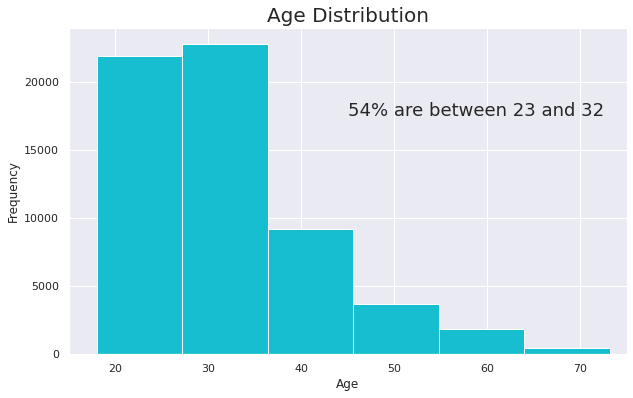

In [13]:
# Age Distribution
df.age.plot(kind="hist", xlim=(15, 75), figsize=(10, 6), color="tab:cyan")
plt.text(45, 17500, "54% are between 23 and 32", fontsize=18)
plt.title("Age Distribution", fontsize=20)
plt.xlabel("Age")
plt.savefig("age_dist.png")
plt.show()

In [14]:
df.income.value_counts().sort_index()

-1          48442
 20000       2952
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 80000       1111
 100000      1621
 150000       631
 250000       149
 500000        48
 1000000      521
Name: income, dtype: int64

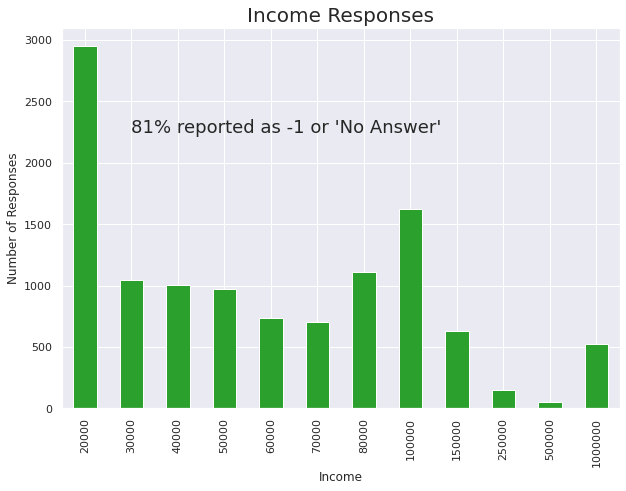

In [15]:
plt.figure(figsize=(10, 7))
df.income.value_counts().sort_index()[1:].plot(kind="bar", color="tab:green")
plt.title("Income Responses", fontsize=20)
plt.text(1, 2250, "81% reported as -1 or 'No Answer'", fontsize=18)
plt.xlabel("Income")
plt.ylabel("Number of Responses")
plt.savefig("income_bar.png")
plt.show()

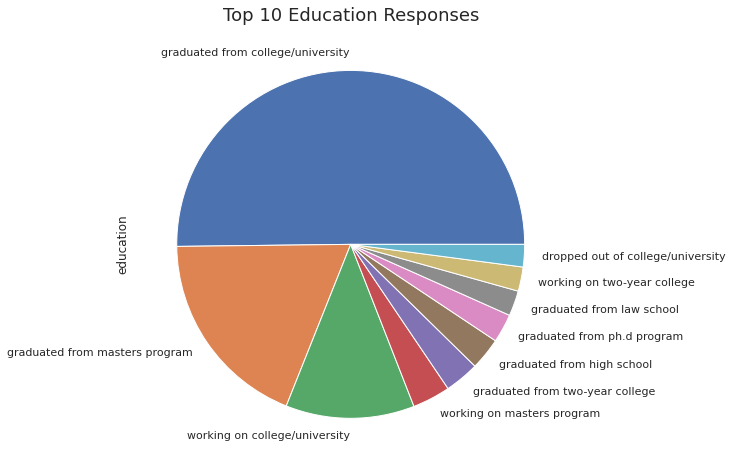

In [16]:
# Top 10 responses in education
df.education.value_counts()[0:10].plot(kind="pie", figsize=(8, 8))
plt.title("Top 10 Education Responses", fontsize=18)
plt.savefig("education_pie.png")
plt.show()

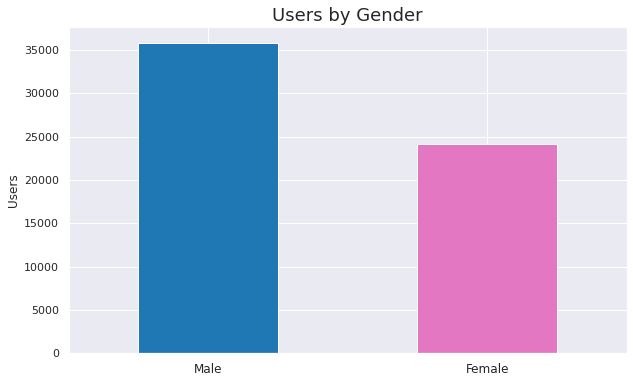

In [17]:
# Gender
df.sex.value_counts().plot(kind="bar", color=["tab:blue", "tab:pink"], figsize=(10,6))
plt.title("Users by Gender", fontsize=18)
plt.ylabel("Users", fontsize=12)
plt.xticks(ticks=[0,1], labels=["Male", "Female"], fontsize=12, rotation=0)
plt.show()

# 4. Formulate a Question

## 4A. Classification Question: Can we predict *gender* based on the following features:

1. Whether a user prefers cats or dogs from the `pets` column
2. A user's `body_type` and `height`
3. How much a user `drinks` or `smokes`

## 4B. Regression Question: Can we predict *height* based on the following features:

1. A user's `diet`
2. Their `drug` use
3. Their gender, or `sex`

# 5. Augment your Data

## 5A. Classification model: Clean and map data

In [18]:
feature_cols = ["pets", "body_type", "height", "drinks", "smokes"]
df_class = df.dropna(subset=feature_cols, axis=0)
df_class.shape

(34422, 31)

In [19]:
# Drop non-needed columns
df_class = df_class.loc[:, feature_cols+["sex"]]
df_class.shape

(34422, 6)

In [20]:
# Map response column: "sex"
# Create new column: sex_code

df_class["sex_code"] = df_class.loc[:, "sex"].apply(lambda x: 1 if x == "m" else 0)

In [21]:
# Map "pets"
# Create & map feature column: pets_code

pets_mapping = {
    "likes dogs and likes cats": 1,
    "likes dogs": 0,
    "likes dogs and has cats": 2,
    "has dogs": 0,
    "has dogs and likes cats": 0,
    "likes dogs and dislikes cats": 0,
    "has dogs and has cats": 1,
    "has cats": 2,
    "likes cats": 2,
    "has dogs and dislikes cats": 0,
    "dislikes dogs and likes cats": 2,
    "dislikes dogs and dislikes cats": -1,
    "dislikes cats": -1,
    "dislikes dogs and has cats": 2,
    "dislikes dogs": -1}
df_class["pets_code"] = df_class.pets.map(pets_mapping)

In [22]:
# Map "body_type"
# Create & map feature column: body_type_code

bt_mapping = {
    "average": 0,
    "fit": 1, 
    "athletic": 1,
    "thin": -1,
    "curvy": 2,
    "a little extra": 2,
    "skinny": -1,
    "full figured": 2,
    "overweight": 3,
    "jacked": 1,
    "used up": -1,
    "rather not say": 0}
df_class["body_type_code"] = df_class.body_type.map(bt_mapping)

In [23]:
# Map "drinks"
# Create & map feature column: drinks_code

drinks_mapping = {
    "socially": 0,
    "rarely": 1,
    "often": 2,
    "not at all": -1,
    "very often": 3,
    "desperately": 3}
df_class["drinks_code"] = df_class.drinks.map(drinks_mapping)

In [24]:
# Map "smokes"
# Create & map feature column: smokes_code

smokes_mapping = {
    "no": 0,
    "sometimes": 1,
    "when drinking": 1,
    "yes": 2,
    "trying to quit": 2,}
df_class["smokes_code"] = df_class.smokes.map(smokes_mapping)

In [25]:
# Sample model dataframe. Looks good!
df_class.sample(5, random_state=40)

,pets,body_type,height,drinks,smokes,sex,sex_code,pets_code,body_type_code,drinks_code,smokes_code
38235,likes dogs and likes cats,curvy,60.0,socially,no,f,0,1,2,0,0
56177,likes dogs,thin,62.0,socially,no,f,0,0,-1,0,0
55224,likes dogs,fit,68.0,socially,no,m,1,0,1,0,0
27481,likes dogs and likes cats,skinny,70.0,often,when drinking,m,1,1,-1,2,1
59485,has cats,average,77.0,often,yes,f,0,2,0,2,2


In [26]:
df_class.shape

(34422, 11)

## 5B. Regression model: Clean and map data

In [27]:
feature_cols = ["diet", "drinks", "drugs", "smokes", "sex"]
df.dropna(subset=feature_cols, axis=0, inplace=True)
df.shape

(26067, 31)

In [28]:
df_reg = df.loc[:, feature_cols+["height"]]
df_reg.shape

(26067, 6)

In [29]:
df_reg.head()

,diet,drinks,drugs,smokes,sex,height
0,strictly anything,socially,never,sometimes,m,75.0
1,mostly other,often,sometimes,no,m,70.0
7,mostly anything,socially,never,no,f,65.0
9,mostly anything,not at all,never,no,m,65.0
11,mostly anything,socially,never,no,m,72.0


In [30]:
# Create & Map response column: diet_code
# other = 0
# anything = 1
# vegetarian = 2
# vegan = 2
# kosher = 3
# halal = 3

diet_mapping = {
    "anything": 1,
    "halal": 3,
    "kosher": 3,
    "mostly anything": 1,
    "mostly halal": 3,
    "mostly kosher": 3,
    "mostly other": 0,
    "mostly vegan": 2,
    "mostly vegetarian": 2,
    "other": 0,
    "strictly anything": 1,
    "strictly halal": 3,
    "strictly kosher": 3, 
    "strictly other": 0,
    "strictly vegan": 2,
    "strictly vegetarian": 2,
    "vegan": 2,
    "vegetarian": 2}
df_reg["diet_code"] = df_reg.diet.map(diet_mapping)

In [31]:
# Map "drinks"
drinks_mapping = {
    "socially": 1,
    "rarely": 1,
    "often": 2,
    "not at all": 0,
    "very often": 2,
    "desperately": 2}
df_reg["drinks_code"] = df_reg.drinks.map(drinks_mapping)

In [32]:
# Map "drugs"
drugs_mapping = {
    "never": 0,
    "sometimes": 1,
    "often": 2}
df_reg["drugs_code"] = df_reg.drugs.map(drugs_mapping)

In [33]:
# Map "smokes"
smokes_mapping = {
    "no": 0,
    "sometimes": 1,
    "when drinking": 1,
    "yes": 2,
    "trying to quit": 2,}
df_reg["smokes_code"] = df_reg.smokes.map(smokes_mapping)

In [34]:
# Map "sex"
df_reg["sex_code"] = df_reg.sex.apply(lambda x: 1 if x == 'm' else 0)

In [36]:
# Sample model dataframe. Looks good!
df_reg.sample(5, random_state=4)

,diet,drinks,drugs,smokes,sex,height,diet_code,drinks_code,drugs_code,smokes_code,sex_code
28848,mostly anything,socially,never,no,m,72.0,1,1,0,0,1
45549,anything,socially,never,no,m,75.0,1,1,0,0,1
53378,kosher,socially,never,no,f,65.0,3,1,0,0,0
31109,anything,socially,never,no,m,68.0,1,1,0,0,1
53849,mostly vegetarian,socially,never,no,f,67.0,2,1,0,0,0


# 6. Normalize Your Data
## 6A. Scale data, split into train and test sets for Classification Models

In [37]:
# Create X (features) and y (response)
X = df_class.loc[:, ["height", "pets_code", "body_type_code", "drinks_code", "smokes_code"]]
y = df_class.sex_code
print(X.shape, y.shape)

(34422, 5) (34422,)


In [38]:
# Create model training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [39]:
# Scale feature data
from sklearn.preprocessing import MinMaxScaler
mm_scaler = MinMaxScaler()
X_train_scaled = mm_scaler.fit_transform(X_train)
X_test_scaled = mm_scaler.transform(X_test)

## 6B. Split data into train and test sets for Regression Models
### First, graph feature set to check for linearity

`diet`, `sex` and `drugs` have some linear relationship and will be used in the model.

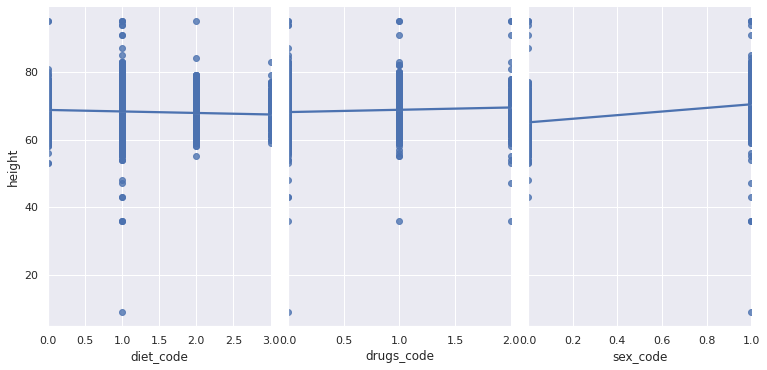

In [40]:
# plt.figure(figsize=(14, 10))
sns.pairplot(df_reg, x_vars=["diet_code", "drugs_code", "sex_code"], y_vars="height", height=5, aspect=0.7, kind='reg')
plt.show()

`drinks` and `smokes` have no linear relationship and will not be used in the model.

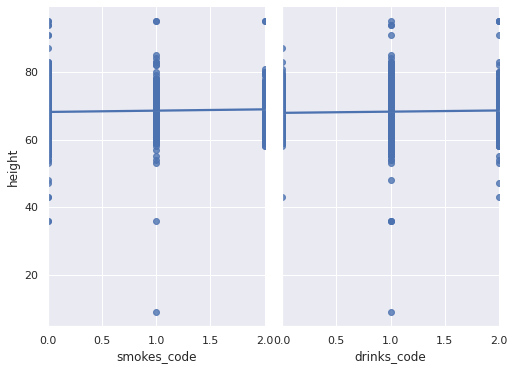

In [41]:
sns.pairplot(df_reg, x_vars=["smokes_code", "drinks_code"], y_vars="height", height=5, aspect=0.7, kind='reg')
plt.show()

In [42]:
# Create X (features) and y (response)
reg_feature_cols = ["diet_code", "drugs_code", "sex_code"]
X_reg = df_reg.loc[:, reg_feature_cols]
y_reg = df_reg.height
print(X_reg.shape, y_reg.shape)

(26067, 3) (26067,)


In [43]:
# Create regression model training and testing sets
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_reg, y_reg, random_state=1)

# 7. Use Classification Techniques
## 7A. Model data for classification question

### Logistic Regression Model

In [44]:
# Import Logistic Regression model
from sklearn.linear_model import LogisticRegression

# instantiate the model
logreg = LogisticRegression()

In [45]:
# Fit, time, score the training accuracy
%time logreg.fit(X_train_scaled, y_train)
print("Training Accuracy:")
logreg.score(X_train_scaled, y_train)

CPU times: user 192 ms, sys: 12.4 ms, total: 205 ms
Wall time: 54.9 ms
Training Accuracy:


0.8292144406569569

### K Nearest Neighbors Model

In [46]:
# Import K Nearest Neighbors model
from sklearn.neighbors import KNeighborsClassifier 

#### KNN K=1

In [47]:
# Instantiate the model with K=1
knn = KNeighborsClassifier(n_neighbors=1)

# Fit, time, score the training accuracy
%time knn.fit(X_train_scaled, y_train)
print("Training Accuracy:")
knn.score(X_train_scaled, y_train)

CPU times: user 202 ms, sys: 89 µs, total: 202 ms
Wall time: 201 ms
Training Accuracy:


0.8058955686396033

#### KNN K=5

In [48]:
# Instantiate the model with K=5
knn = KNeighborsClassifier(n_neighbors=5)

# Fit, time, score the training accuracy
%time knn.fit(X_train_scaled, y_train)
print("Training Accuracy:")
knn.score(X_train_scaled, y_train)

CPU times: user 200 ms, sys: 0 ns, total: 200 ms
Wall time: 199 ms
Training Accuracy:


0.8328168577626278

# 9. Analyze the Accuracy, Precision and Recall

## 9A. Classification model metrics

In [49]:
from sklearn import metrics

### Score Logistic Regression Model

In [50]:
# Results on the Testing Set
y_pred = logreg.predict(X_test_scaled)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred, average="weighted"))
print("Recall: ", metrics.recall_score(y_test, y_pred, average="weighted"))

Accuracy:  0.8270973739251685
Precision:  0.8265134165201126
Recall:  0.8270973739251685


### Score KNN Model
### K=1

In [51]:
# Results on the Testing Set K=1
knn = KNeighborsClassifier(n_neighbors=1)
%time knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred, average="weighted"))
print("Recall: ", metrics.recall_score(y_test, y_pred, average="weighted"))

CPU times: user 201 ms, sys: 6 µs, total: 201 ms
Wall time: 200 ms
Accuracy:  0.7829421333953056
Precision:  0.783163884427593
Recall:  0.7829421333953056


### K=5

In [52]:
# Results on the Testing Set K=5
knn = KNeighborsClassifier(n_neighbors=5)
%time knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred, average="weighted"))
print("Recall: ", metrics.recall_score(y_test, y_pred, average="weighted"))

CPU times: user 199 ms, sys: 0 ns, total: 199 ms
Wall time: 203 ms
Accuracy:  0.8178015338136184
Precision:  0.81712750721065
Recall:  0.8178015338136184


### Can we find a better value for K?

In [53]:
# try K=1 through K=25 and record testing accuracy
k_range = list(range(1, 26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

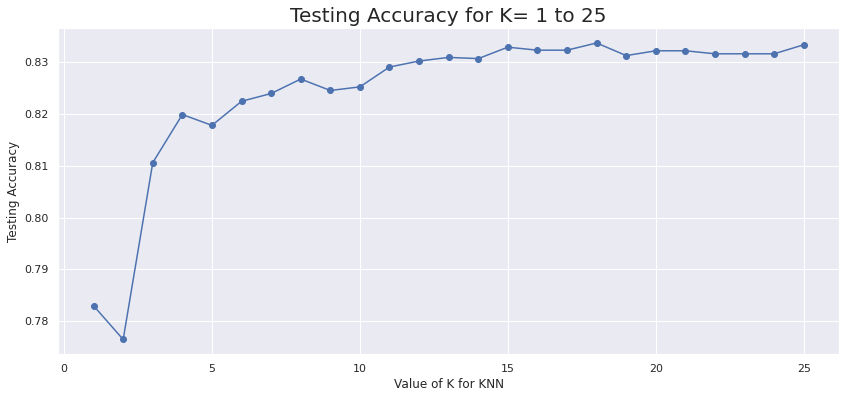

In [54]:
# plot the relationship between K and testing accuracy
plt.figure(figsize=(14, 6))
plt.plot(k_range, scores, marker="o")
plt.title('Testing Accuracy for K= 1 to 25', fontsize=20)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [55]:
print("Max testing data score: ", max(scores))
print("Index: ", scores.index(max(scores)))

Max testing data score:  0.833720660004648
Index:  17


In [56]:
# Highest accuracy for K= 1 to 25 was K=18
knn = KNeighborsClassifier(n_neighbors=18)
%time knn.fit(X_train_scaled, y_train)
print("Training Accuracy:")
knn.score(X_test_scaled, y_test)

CPU times: user 202 ms, sys: 0 ns, total: 202 ms
Wall time: 201 ms
Training Accuracy:


0.833720660004648

### Null Accuracy

In [57]:
# Null Accuracy
y.value_counts(normalize=True)

1    0.578119
0    0.421881
Name: sex_code, dtype: float64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Accuracy results for classification models 
1. K Nearest Neighbor K=1 = **78.3%** (197 ms)
2. K Nearest Neighbor K=5 = **81.8%** (195 ms)
3. K Nearest Neighbor K=18 = **83.4%** (197 ms)
4. Logistic Regression = **82.7%** (62.1 ms)
5. Null accuracy = **57.8%**

KNN and Logistic Regression both scored around **83%** accuracy. Significantly better than null accuracy of 58%

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# 8. Use Regression Techniques
## Multiple Linear Regression

In [58]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
%time linreg.fit(X_reg_train, y_reg_train)

CPU times: user 7.15 ms, sys: 0 ns, total: 7.15 ms
Wall time: 5.37 ms


LinearRegression()

In [59]:
linreg.score(X_reg_train, y_reg_train)

0.4398039711719711

In [60]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

64.97996809014819
[0.04243895 0.35335833 5.33233958]


In [61]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

[('diet', 0.04243895326807145),
 ('drinks', 0.3533583299528109),
 ('drugs', 5.332339583540007)]

## K Neighbors Regressor Model

In [62]:
# import K Neighbors Regressor model
from sklearn.neighbors import KNeighborsRegressor

# instantiate
knr = KNeighborsRegressor(n_neighbors=5, weights="distance")

# fit the model to the training data
%time knr.fit(X_reg_train, y_reg_train)

# score KNR model on training data
print(knr.score(X_reg_train, y_reg_train))

CPU times: user 256 ms, sys: 0 ns, total: 256 ms
Wall time: 255 ms
0.4043591876608905


# 9B. Regression model metrics

## Multiple Linear Regression metrics

In [63]:
# make predictions on the testing set
y_pred = linreg.predict(X_reg_test)

# R^2 score on training data
print("R^2 on training set: ", linreg.score(X_reg_train, y_reg_train))
# R^2 score on testing data
print("R^2 on testing set: ", linreg.score(X_reg_test, y_reg_test))

R^2 on training set:  0.4398039711719711
R^2 on testing set:  0.4491875574130858


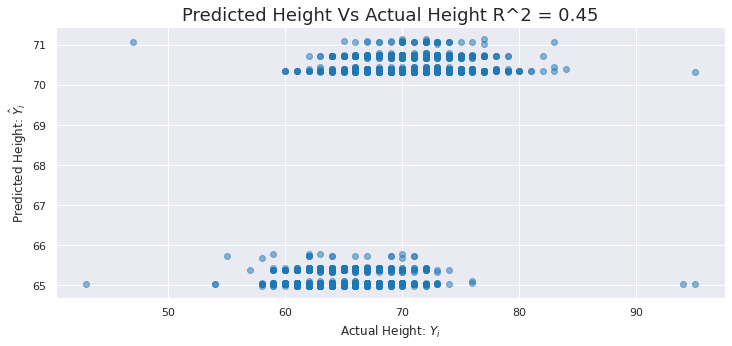

In [64]:
# Graph predictions from testing set
plt.figure(figsize=(12, 5))
plt.scatter(y_reg_test, y_pred, color="tab:blue", alpha=0.5)
plt.title("Predicted Height Vs Actual Height R^2 = 0.45", fontsize=18)
plt.xlabel("Actual Height: $Y_i$", fontsize=12)
plt.ylabel("Predicted Height: $\hat{Y}_i$", fontsize=12)
plt.show()

### Model evaluation metrics for regression

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. Instead, we need evaluation metrics designed for comparing continuous values.

Let's calculate **the most common evaluation metric** for regression problems:

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [65]:
# calculate RMSE using scikit-learn
from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(y_reg_test, y_pred)))

2.9156327455085047


RMSE is roughly 3 inches

## KNR Model Evaluation
### KNR K=5

In [66]:
print("Training set R^2: ", knr.score(X_reg_train, y_reg_train))
print("Testing set R^2: ", knr.score(X_reg_test, y_reg_test))

Training set R^2:  0.4043591876608905
Testing set R^2:  0.41311678499935345


### Can we achieve higher R^2 with a different value for K?

In [67]:
k_range = range(1, 51)
scores = []
for k in k_range:
    knr = KNeighborsRegressor(n_neighbors=k)
    knr.fit(X_reg_train, y_reg_train)
    scores.append(knr.score(X_reg_test, y_reg_test))    

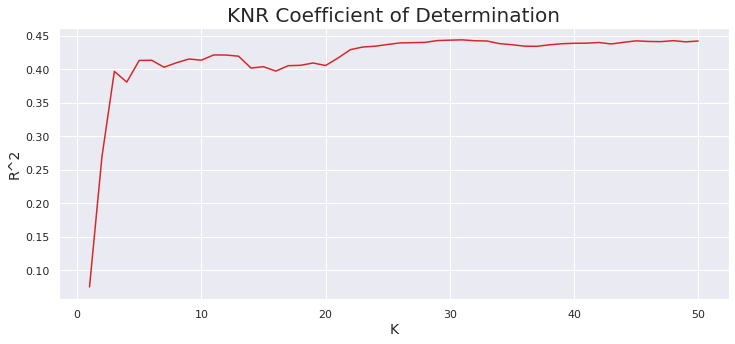

In [68]:
plt.figure(figsize=(12,5))
plt.plot(k_range, scores, color="tab:red")
plt.title("KNR Coefficient of Determination", fontsize=20)
plt.xlabel("K", fontsize=14)
plt.ylabel("R^2", fontsize=14)
plt.show()

In [69]:
# Maximum R^2 is K=31
scores.index(max(scores))

30

In [70]:
# Accuracy score for K=31
knr = KNeighborsRegressor(n_neighbors=31)
%time knr.fit(X_reg_train, y_reg_train)
print(knr.score(X_reg_test, y_reg_test))

CPU times: user 258 ms, sys: 22 µs, total: 258 ms
Wall time: 257 ms
0.4438303591545545


In [71]:
# RMSE
y_pred = knr.predict(X_reg_test)
print(np.sqrt(metrics.mean_squared_error(y_reg_test, y_pred)))

2.929777149258132


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

### Results for regression models 
1. KNR K=5 R^2 = **0.413** (253 ms)
2. KNR K=31 R^2 = **0.444** (252 ms)
3. Linear Regression R^2 (training set) = **0.450** (6.7 ms)
4. Linear Regression Root Mean Squared Error = **2.92** (roughly 3 inches)
5. KNR RMSE: **2.93**

Models have **R^2** around **0.45** showing some linear relationship. **RMSE** of around **3** inches isn't bad considering the number of outliers in the data.

y response class `height` range= 9 in. to 95 in. (0'-9" to 7'-9")

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)